Описание задания:
В домашнем задании необходимо применить полученные знания в теории оптимизации и машинном обучении для реализации логистической регрессии.
Этапы работы:**

1.Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. 
В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

2.Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

3.Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

4.Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).

5.Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).

6.Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [79]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import seaborn as sns

In [62]:
#грузим данные, фильтруем Iris Versicolor, Iris Virginica (1 , 2)
iris_df = load_iris(as_frame=True).frame
iris_df = iris_df.loc[iris_df['target'] > 0]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [224]:
# подготавливаем данные
X = iris_df.drop('target', axis= 1)
y = pd.Series(iris_df['target']) - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
params = np.ones(X_train.shape[1])

learn_rate = 0.01 
iterations = 1000

In [218]:
class LR_functions:
                
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
                
    def compute_cost(x, y, theta):
        hx = sigmoid(x @ theta)
        return ((-y) * np.log(hx) - (1 - y) * np.log(1 - hx)).mean()
        
    def predict(self, X, params):
        return np.round(sigmoid(X @ params))
    
    def gradient_descent(self, X, y, params, learning_rate, iterations):
        m = len(y)
        cost_ = np.zeros((iterations,1))
    
        for i in range(iterations):
            params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
            cost_[i] = compute_cost(X, y, params)

        return (cost_, params)
    
    def RMS_Prop(self, X, y, params, learning_rate, iterations, epsilon, gamma):
        m = len(y)
        cost_ = np.zeros((iterations,1))
        sq_grad = np.zeros(5)
    
        for i in range(iterations):
            grad =  (X.T @ (sigmoid(X @ params) - y)) / m
            cost_[i] = compute_cost(X, y, params)
            sq_grad = gamma * sq_grad + (1 - gamma) * grad ** 2
            params -= learning_rate * grad / np.sqrt(sq_grad + epsilon)
        
        return (cost_, params)
    
    
    
    def nadam(self, X, y, params, learning_rate, iterations, gamma):
        m = len(y)
        cost_ = np.zeros((iterations,1))
        v=0
        for i in range(iterations):
            grad = (X.T @ (sigmoid(X @ params) - y)) / m
            v = gamma * v - learning_rate * grad
            params += v
            cost_[i] = compute_cost(X, y, params)

        return (cost_, params)

In [219]:

lr = LR_functions()

In [197]:
%%time
res = lr.gradient_descent(X_train, y_train, params, learn_rate, iterations)



CPU times: total: 859 ms
Wall time: 844 ms


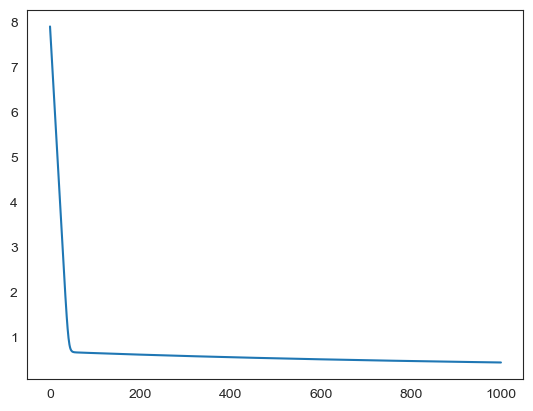

In [198]:
plt.plot(res[0])
plt.show()

In [199]:
X_ = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_pred = lr.predict(X_, res[1])
score = float(sum(y_pred == y_test))/ float(len(y_test))

print(score)

0.9666666666666667


In [200]:
%%time

res = lr.RMS_Prop(X_train, y_train, params, learn_rate, iterations, epsilon=0.000001, gamma=0.9)

CPU times: total: 875 ms
Wall time: 869 ms


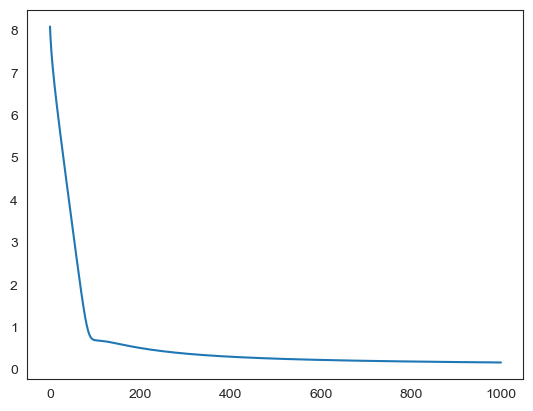

In [201]:
plt.plot(res[0])
plt.show()

In [202]:
X_ = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_pred = lr.predict(X_, res[1])
score = float(sum(y_pred == y_test))/ float(len(y_test))

print(score)

0.9333333333333333


In [225]:
%%time

res = lr.nadam(X_train, y_train, params, learn_rate, iterations, gamma=0.975)

CPU times: total: 828 ms
Wall time: 873 ms


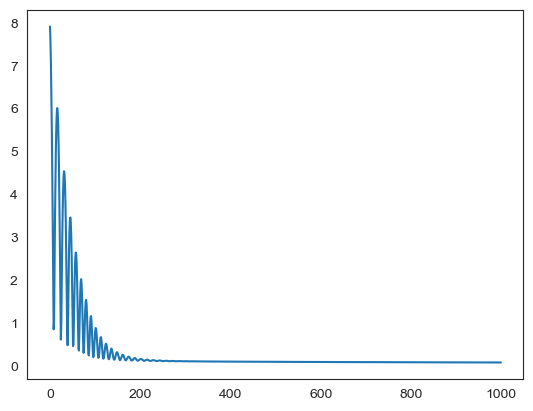

In [226]:
plt.plot(res[0])
plt.show()

In [227]:
X_ = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_pred = lr.predict(X_, res[1])
score = float(sum(y_pred == y_test))/ float(len(y_test))

print(score)

0.9333333333333333


In [234]:
tab = pd.DataFrame({'alg': ['gradient_descent', 'RMS_Prop', 'nadam'], 'score' : [0.97, 0.93, 0.93], 'time' : [859, 875, 828]})
tab

,alg,score,time
0,gradient_descent,0.97,859
1,RMS_Prop,0.93,875
2,nadam,0.93,828


Луший результат у gradient_descenе. По времени nadam